Matplotlib plotting

<class 'pandas.core.frame.DataFrame'>
Index: 333 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            333 non-null    object 
 1   island             333 non-null    object 
 2   bill_length_mm     333 non-null    float64
 3   bill_depth_mm      333 non-null    float64
 4   flipper_length_mm  333 non-null    float64
 5   body_mass_g        333 non-null    float64
 6   sex                333 non-null    object 
dtypes: float64(4), object(3)
memory usage: 20.8+ KB
None

Dataset shape: (333, 7)

Dataset columns: Index(['species', 'island', 'bill_length_mm', 'bill_depth_mm',
       'flipper_length_mm', 'body_mass_g', 'sex'],
      dtype='object')

Summary statistics:
        bill_length_mm  bill_depth_mm  flipper_length_mm  body_mass_g
count      333.000000     333.000000         333.000000   333.000000
mean        43.992793      17.164865         200.966967  4207.057057
std

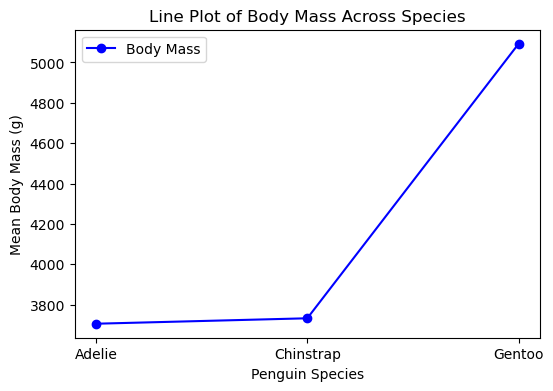

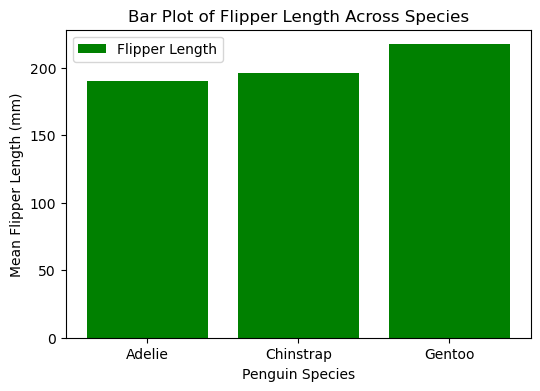

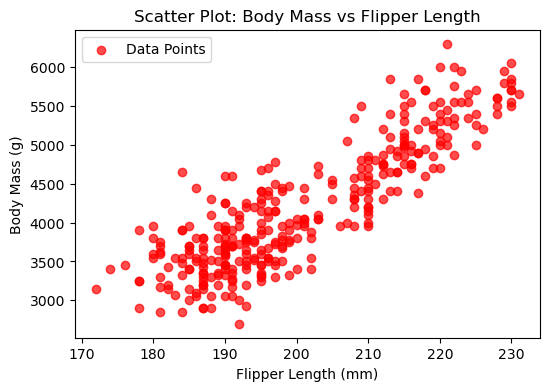

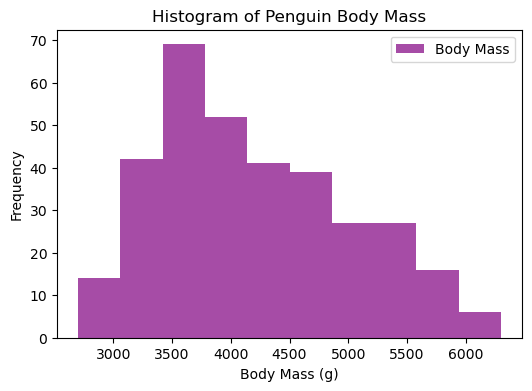

C:\Users\patha\AppData\Local\Temp\ipykernel_4184\2698581943.py:57: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([dataset["body_mass_g"], dataset["flipper_length_mm"]], labels=['Body Mass (g)', 'Flipper Length (mm)'])


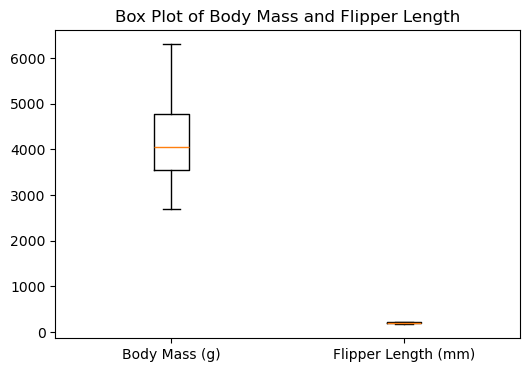

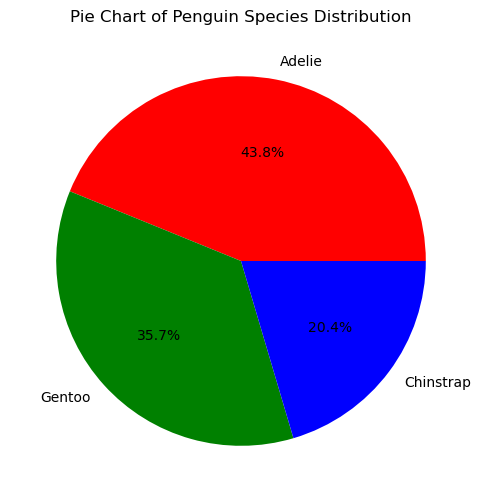

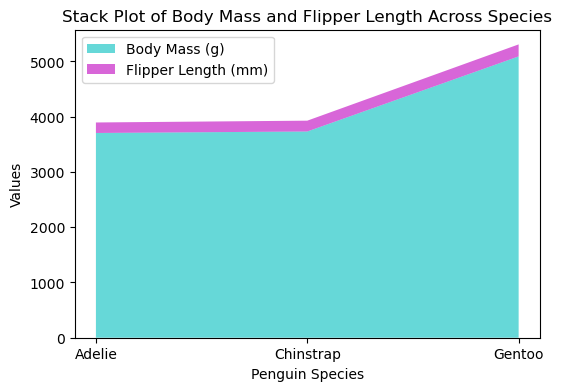

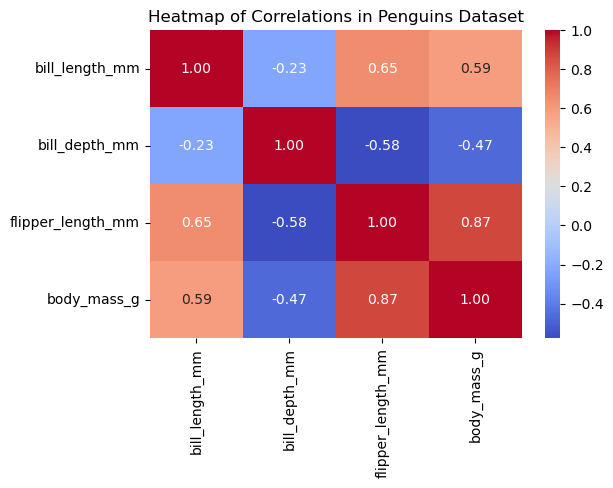

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
dataset = sns.load_dataset('penguins')

# Handle missing values
dataset = dataset.dropna()

# Display dataset info
print(dataset.info())
print("\nDataset shape:", dataset.shape)
print("\nDataset columns:", dataset.columns)
print("\nSummary statistics:\n", dataset.describe())

# Line plot
plt.figure(figsize=(6,4))
grouped_data = dataset.groupby("species")["body_mass_g"].mean().reset_index()
plt.plot(grouped_data["species"], grouped_data["body_mass_g"], marker='o', linestyle='-', color='b', label='Body Mass')
plt.xlabel('Penguin Species')
plt.ylabel('Mean Body Mass (g)')
plt.title('Line Plot of Body Mass Across Species')
plt.legend()
plt.show()

# Bar plot
plt.figure(figsize=(6,4))
grouped_data = dataset.groupby("species")["flipper_length_mm"].mean().reset_index()
plt.bar(grouped_data["species"], grouped_data["flipper_length_mm"], color='g', label='Flipper Length')
plt.xlabel('Penguin Species')
plt.ylabel('Mean Flipper Length (mm)')
plt.title('Bar Plot of Flipper Length Across Species')
plt.legend()
plt.show()

# Scatter plot
plt.figure(figsize=(6,4))
plt.scatter(dataset["flipper_length_mm"], dataset["body_mass_g"], color='r', alpha=0.7, label='Data Points')
plt.xlabel('Flipper Length (mm)')
plt.ylabel('Body Mass (g)')
plt.title('Scatter Plot: Body Mass vs Flipper Length')
plt.legend()
plt.show()

# Histogram
plt.figure(figsize=(6,4))
plt.hist(dataset["body_mass_g"], bins=10, color='purple', alpha=0.7, label='Body Mass')
plt.xlabel('Body Mass (g)')
plt.ylabel('Frequency')
plt.title('Histogram of Penguin Body Mass')
plt.legend()
plt.show()

# Box plot
plt.figure(figsize=(6,4))
plt.boxplot([dataset["body_mass_g"], dataset["flipper_length_mm"]], labels=['Body Mass (g)', 'Flipper Length (mm)'])
plt.title('Box Plot of Body Mass and Flipper Length')
plt.show()

# Pie chart
plt.figure(figsize=(6,6))
species_counts = dataset["species"].value_counts()
plt.pie(species_counts, labels=species_counts.index, autopct='%1.1f%%', colors=['r', 'g', 'b'])
plt.title('Pie Chart of Penguin Species Distribution')
plt.show()

# Stacked bar plot (Fix: Convert species to numerical indices)
plt.figure(figsize=(6,4))
species_data = dataset.groupby("species")[["body_mass_g", "flipper_length_mm"]].mean()
x = range(len(species_data))
y = species_data["body_mass_g"]
z = species_data["flipper_length_mm"]
plt.stackplot(x, y, z, labels=['Body Mass (g)', 'Flipper Length (mm)'], colors=['c', 'm'], alpha=0.6)
plt.xticks(ticks=x, labels=species_data.index)  # Add species labels
plt.xlabel('Penguin Species')
plt.ylabel('Values')
plt.title('Stack Plot of Body Mass and Flipper Length Across Species')
plt.legend()
plt.show()

# Heatmap (Fix: Use only numeric columns)
plt.figure(figsize=(6,4))
correlation_matrix = dataset.select_dtypes(include=[np.number]).corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Heatmap of Correlations in Penguins Dataset')
plt.show()


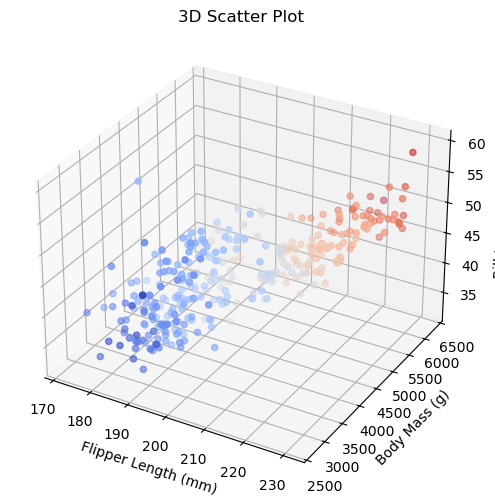

In [2]:
# Create 3D figure
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot
ax.scatter(dataset["flipper_length_mm"], dataset["body_mass_g"], dataset["bill_length_mm"], 
           c=dataset["body_mass_g"], cmap="coolwarm", marker="o")

# Labels
ax.set_xlabel("Flipper Length (mm)")
ax.set_ylabel("Body Mass (g)")
ax.set_zlabel("Bill Length (mm)")
ax.set_title("3D Scatter Plot")

plt.show()